In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from pylab import *


In [2]:
#import the xyz files and get the atoms in a list
CO_O_Ru = pd.read_csv('CO_O_Ru.csv', sep=',', header=None)
print(CO_O_Ru.values)

[[0.00709277 0.9853895020000001 0.820757602 'Ru']
 [0.34229643200000004 0.9877208909999999 0.821810248 'Ru']
 [0.674113367 0.99165528 0.8218475759999999 'Ru']
 [0.010228858 0.234882321 0.8274280909999999 'Ru']
 [0.34663815299999995 0.236744433 0.822079008 'Ru']
 [0.671452808 0.236251828 0.82131752 'Ru']
 [0.019544913 0.487510946 0.822915153 'Ru']
 [0.34137203899999996 0.488880452 0.822198458 'Ru']
 [0.6650049170000001 0.487131858 0.822945015 'Ru']
 [0.008492572 0.74077902 0.819809474 'Ru']
 [0.336915973 0.7408602540000001 0.8201230279999999 'Ru']
 [0.667275991 0.749135613 0.823172715 'Ru']
 [0.016991096 0.223166012 0.8970109620000001 'C']
 [0.023469247999999998 0.21277234399999997 0.9399566690000001 'O']
 [0.785673003 0.5733024489999999 0.8671262740000001 'O']]


In [3]:
# Brilliant.  Moving on.  
# Get the lattice vectors.
lattice_vectors = pd.read_csv('lattice_vectors.csv', sep=',', header=None)
print(lattice_vectors.values)


[[ 8.31557575  0.          0.        ]
 [ 5.54371717  9.60199979  0.        ]
 [ 0.          0.         26.78963917]]


In [4]:
# Convert to Angstroms instead of fractions of the unit cell vectors.
# An N-atom by 3 matrix times 3x3 lattice matrix yields an Nx3 matrix.
CO_O_Ru_angs=np.matmul(CO_O_Ru.iloc[:, 0:3],lattice_vectors)
CO_O_Ru_angs = np.array(CO_O_Ru_angs)
print(CO_O_Ru_angs)

[[ 5.52170116  9.46170979 21.9878    ]
 [ 8.32203717  9.48409579 22.01600001]
 [11.10309716  9.52187379 22.01700001]
 [ 1.38718     2.25534    22.1665    ]
 [ 4.19494     2.27322    22.02319999]
 [ 6.89323     2.26849    22.0028    ]
 [ 2.86515     4.68108    22.04560002]
 [ 5.54892     4.69423    22.02640002]
 [ 8.23042     4.67744    22.04640001]
 [ 4.17728999  7.11296    21.9624    ]
 [ 6.90877     7.11374    21.9708    ]
 [ 9.70178     7.1932     22.05250001]
 [ 1.37846     2.14284    24.0306    ]
 [ 1.37471001  2.04304    25.1811    ]
 [ 9.71155     5.50485    23.23      ]]


In [5]:
# Slice off unnecessary z-space below.  Convert to atomic units of length.
CO_O_Ru_angs[:, 2] = CO_O_Ru_angs[:, 2] - 20
CO_O_Ru_au = CO_O_Ru_angs/0.52917721067121
print(CO_O_Ru_au)

[[10.43450294 17.88004019  3.7563976 ]
 [15.72637105 17.92234359  3.80968789]
 [20.98181278 17.99373367  3.81157762]
 [ 2.62139028  4.26197491  4.09409165]
 [ 7.9272877   4.29576322  3.82329388]
 [13.02631682  4.28682482  3.78474349]
 [ 5.41434882  8.84595918  3.86562379]
 [10.4859391   8.87080907  3.82934105]
 [15.5532397   8.83908057  3.86713556]
 [ 7.89393404 13.44154633  3.70839854]
 [13.05568317 13.44302034  3.72427224]
 [18.33370714 13.59317797  3.87866289]
 [ 2.60491187  4.04938073  7.61673013]
 [ 2.59782541  3.86078607  9.79086002]
 [18.35216975 10.40265885  6.10381538]]


In [6]:
#Ready to start iterating?
a1 = 24
a2 = 24
a3 = 24


In [7]:
CO_O_Ru = np.array(CO_O_Ru)
split = np.linspace(0,a1,16)
#print(split_x)

V_ext_x = []

for i in split:
    #V_ext = 0
    mini_sum = 0
    for j in range(len(CO_O_Ru_angs)):

        distance_x = np.sqrt(np.power(CO_O_Ru_au[j,0] - i,2))


        pseudopotential_x = np.exp(-np.power(distance_x/(1),2))

        #print(pseudopotential)
        element = CO_O_Ru[j,3]
        if element == 'Ru':
            charge = 10#44
        elif element == 'C':
            charge = 6
        elif element == 'O':
            charge = 8
        else:
            charge = 0.0
            
        mini_sum = mini_sum-28*charge*pseudopotential_x #28 is all the valence electrons of the system
        
    V_ext_x.append(mini_sum) 


print(min(V_ext_x))
print(np.sum(V_ext_x)/16)
V_ext_oper = np.diag(V_ext_x)
#V_ext_oper[0,0] = -V_ext
print(V_ext_x)
print(V_ext_oper)

-557.0673764447356
-273.6644796278884
[-0.7427371369483924, -242.6093725740666, -476.1861390872446, -197.5533679267178, -163.20821293795257, -557.0673764447356, -299.58249572526285, -342.9196263232818, -530.8598656630694, -210.6440407634148, -491.3208403136243, -303.2732281388585, -253.06913441001637, -272.09445338383364, -37.46981099327492, -0.030972223912371796]
[[-7.42737137e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.42609373e+02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -4.76186139e+02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.

In [8]:
# Great!  Now, move on to the kinetic energy.  
# The kinetic energy matrix will also be diagonal.
# There is one kinetic energy at each spatial point.
# It is a second derivative.

In [9]:
E_kin_oper = np.zeros((16,16))
for m in range(16):
    for n in range(16):
        if m==n:
            E_kin_oper[m,n] = -2
        if n == m - 1:
            E_kin_oper[m,n] = 1
        if n == m + 1:
            E_kin_oper[m,n] = 1
E_kin_oper[0,-1] = 1
E_kin_oper[-1,0] = 1
E_kin_oper = -(1/np.power((a1/2),2))*E_kin_oper
print(E_kin_oper)

[[ 0.01388889 -0.00694444 -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.00694444]
 [-0.00694444  0.01388889 -0.00694444 -0.         -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.        ]
 [-0.         -0.00694444  0.01388889 -0.00694444 -0.         -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.        ]
 [-0.         -0.         -0.00694444  0.01388889 -0.00694444 -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.        ]
 [-0.         -0.         -0.         -0.00694444  0.01388889 -0.00694444
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.         -0.         -0.        ]
 [-0.         -0.         -0.         -0.         -0.00694444  0.01388889
  -

In [10]:
V_e_e_oper = a1/16*np.eye(16)

In [11]:
V_nuc_scalar = 0
for k in range(len(CO_O_Ru_au)):
    for l in range(len(CO_O_Ru_au)):
        if k!=l:
            distance = np.sqrt(np.sum(np.power(CO_O_Ru_au[k,:] - CO_O_Ru_au[l,:],2)))
            element1 = CO_O_Ru[k,3]
            if element1 == 'Ru':
                charge1 = 44
            elif element1 == 'C':
                charge1 = 6
            elif element1 == 'O':
                charge1 = 8
            else:
                charge1 = 0.0
            element2 = CO_O_Ru[l,3]
            if element2 == 'Ru':
                charge2 = 44
            elif element2 == 'C':
                charge2 = 6
            elif element2 == 'O':
                charge2 = 8
            else:
                charge2 = 0.0
            pseudopotential = charge1*charge2*np.exp(-np.power(distance/(1),2))
            V_nuc_scalar += charge*pseudopotential/2 #Divided by two because otherwise every pair interaction is counted twice
print(V_nuc_scalar)
V_nuc_oper = V_nuc_scalar*np.eye(16)
print(V_nuc_oper)

3.2907599324517207
[[3.29075993 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         3.29075993 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         3.29075993 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         3.29075993 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         3.29075993 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         3.29075993
  0.         0.         0.         0.         0.         0.
  0.         0.   

[[ 4.06191168e+00 -6.94444444e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.94444444e-03]
 [-6.94444444e-03 -2.37804724e+02 -6.94444444e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -6.94444444e-03 -4.71381490e+02 -6.94444444e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -6.94444444e-03 -1.92748719e+02
  -6.94444444e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00

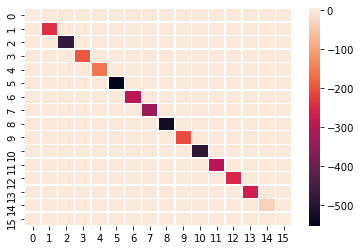

In [12]:
H_oper = V_ext_oper + E_kin_oper + V_e_e_oper + V_nuc_oper
fig = sns.heatmap(H_oper, linewidth=0.5)
plt.savefig('CO_O_Ru_Hamiltonian.png',dpi=300)
print(H_oper)

eigenvalues:  [   4.06184414    4.77374563  -32.66516325 -471.38149065 -237.80472375
 -158.40356259 -192.74872034 -267.2898073  -552.26272793 -248.26448209
 -298.46858002 -486.51619192 -294.7778456  -338.11497836 -205.83939162
 -526.05521725]
minimum eigenvalue: 
-552.2627279331322
minimum eigenvector: 
[ 8.06105718e-24  6.45775735e-19  2.92420758e-14  3.40579176e-10
  1.76317960e-05  9.99999999e-01  2.69702998e-05  8.74600202e-10
  2.31679087e-13 -1.24772134e-16 -4.75220815e-18 -5.12297343e-16
 -3.47725865e-16 -1.23699965e-17  3.79109754e-20  1.58407187e-24]


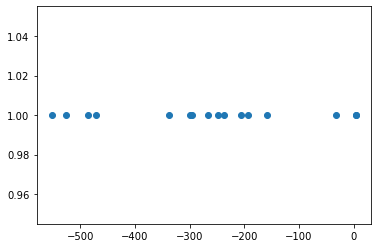

In [13]:
w, v = np.linalg.eig(H_oper)
print('eigenvalues: ',w)
plt.scatter(w,np.ones(len(w)))
print("minimum eigenvalue: ")
print(np.min(w))
print("minimum eigenvector: ")
print(v[:,np.argmin(w)])

In [14]:
pd.DataFrame(H_oper).to_csv('Ham_CO_O_Ru.csv',index=False)
print(H_oper.size)

256
